In [2]:
#1
import numpy as np

def generate_random_variables(cov_matrix, mean_vector, num_samples):

    A = np.linalg.cholesky(cov_matrix)
    
    z = np.random.normal(size=(num_samples, len(mean_vector)))
    
    x = np.dot(z, A) + mean_vector
    
    return x

# Пример использования
cov_matrix = np.array([[1, 0.5], [0.5, 1]])
mean_vector = np.array([0, 0])
num_samples = 1000

random_variables = generate_random_variables(cov_matrix, mean_vector, num_samples)
print(random_variables)

[[ 0.13189825  0.39368583]
 [-1.05989463  0.20946473]
 [ 1.98189397 -0.42461029]
 ...
 [-0.91533565 -0.02653309]
 [-0.50429744 -0.82860227]
 [-0.27800026 -0.10534992]]


In [6]:
#2
import pandas as pd
import numpy as np

# Генерация случайных данных
np.random.seed(0)
T = np.arange(20, 100, 10)  # Температура
U = np.random.uniform(1, 10, size=len(T))  # Напряжение
I = np.random.uniform(0.1, 1, size=len(T))  # Ток

# Создание DataFrame
data = pd.DataFrame({
    'T': T,
    'U': U,
    'I': I
})

# Сохранение в Excel-файл
data.to_excel("data.xlsx", index=False)

print(data)

    T         U         I
0  20  5.939322  0.967296
1  30  7.436704  0.445097
2  40  6.424870  0.812553
3  50  5.903949  0.576005
4  60  4.812893  0.611240
5  70  6.813047  0.933037
6  80  4.938285  0.163932
7  90  9.025957  0.178416


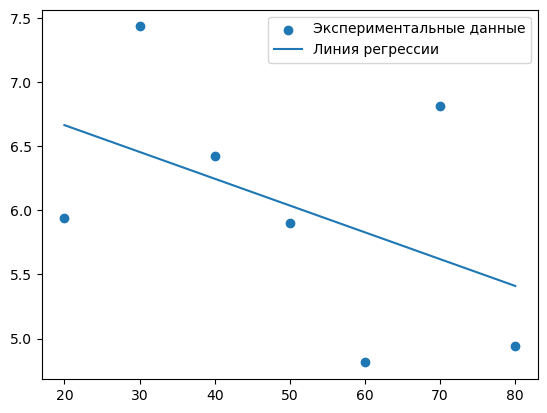

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_excel("data.xlsx")

T = data["T"][:-1].values.reshape(-1, 1)
U = data["U"][:-1].values

model = LinearRegression()

model.fit(T, U)

U_pred = model.predict(T)

plt.scatter(T, U, label="Экспериментальные данные")
plt.plot(T, U_pred, label="Линия регрессии")
plt.legend()
plt.show()

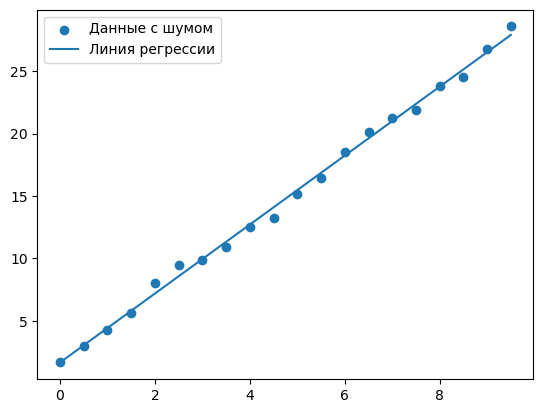

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

true_w1 = 2.8
true_w0 = 1.5
xs = np.arange(0, 10, 0.5).reshape(-1, 1)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise

model = LinearRegression()

model.fit(xs, ys)

ys_pred = model.predict(xs)

plt.scatter(xs, ys, label="Данные с шумом")
plt.plot(xs, ys_pred, label="Линия регрессии")
plt.legend()
plt.show()

In [5]:
#3
import numpy as np
from scipy.optimize import minimize

def likelihood(params, x):
    mu, sigma = params
    return -np.sum(np.log(np.sqrt(2 * np.pi * sigma**2)) + (x - mu)**2 / (2 * sigma**2))

x = np.array([1, 2, 3, 4, 5])
result = minimize(lambda params: -likelihood(params, x), [0, 1])

print("Максимизированные параметры:", result.x)

Максимизированные параметры: [2.99999993 1.41421358]


In [9]:
#4
import numpy as np

A = np.array([[1, 0.5], [0.5, 1]])

S = np.linalg.cholesky(A)

z = np.random.normal(size=(1000, 2))
y = np.dot(z, S)

print("Средфнее значение:", np.mean(y, axis=0))
print("Ковариационная матрица:", np.cov(y, rowvar=False))

Среднее значение: [-0.03703331 -0.0144012 ]
Ковариационная матрица: [[1.17465753 0.40743524]
 [0.40743524 0.72226863]]


In [10]:
correlators = np.mean(y[:, 0] * y[:, 1])

print("Парный коррелятор:", correlators)

Парный коррелятор: 0.4075611251049109


In [13]:
#5
systematic_errors = np.std(y, axis=0)
print(systematic_errors)

[1.09097102 0.86554976]
